Buscando información de la vulnerabilidad en MITRE: CVE-2016-3333
Buscando información de la vulnerabilidad en MITRE: CVE-2022-1234
Buscando información de la vulnerabilidad en MITRE: CVE-2023-5678
{
    "nombre_software": "Facebook",
    "fecha": "2024-04-19",
    "vulnerabilidades": {
        "Alta": [],
        "Media": [
            {
                "CVE": "CVE-2022-1234",
                "CVSS": 4.3,
                "Descripci\u00f3n": "XSS in livehelperchat in GitHub repository livehelperchat/livehelperchat prior to 3.97. This vulnerability has the potential to deface websites, result in compromised user accounts, and can run malicious code on web pages, which can lead to a compromise of the user\u00e2\u20ac\u2122s device."
            }
        ],
        "Baja": [],
        "Cr\u00edtica": [
            {
                "CVE": "CVE-2016-3333",
                "CVSS": 9.3,
                "Descripci\u00f3n": "The Common Log File System (CLFS) driver in Microsoft Windows Vista 

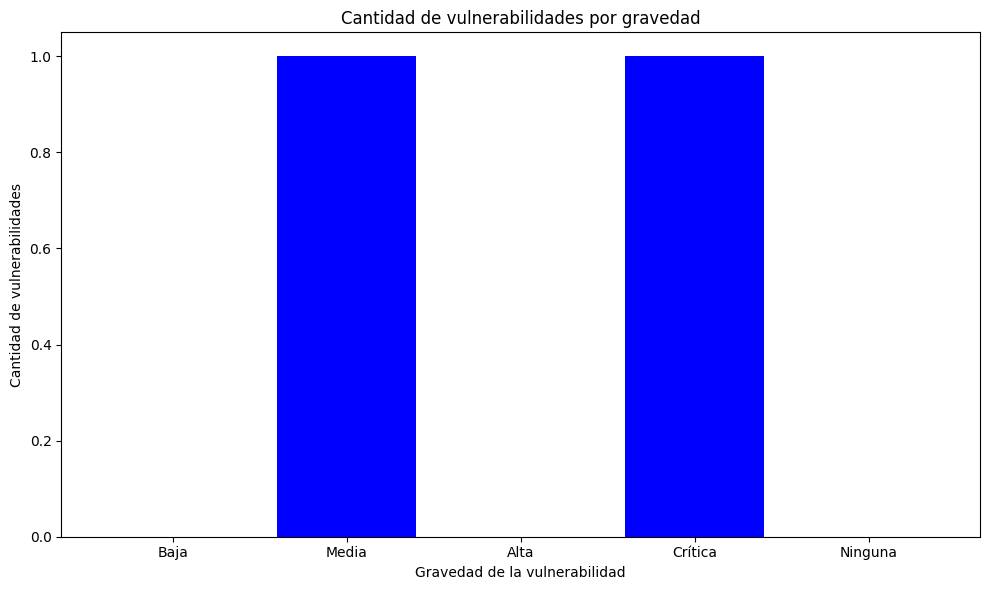

In [12]:
import requests
import json
from datetime import datetime
import uuid
import matplotlib.pyplot as plt

nombre_software = 'Facebook'  # Coloca el nombre de tu software
MITRE_API_URL = 'https://cve.circl.lu/api/cve/'  # Uso API Mitre
cve_ids = ['CVE-2016-3333', 'CVE-2022-1234', 'CVE-2023-5678']  # CVEs

# Función para obtener datos de MITRE
def obtener_datos_mitre(cve_id):
    """
    Busca información sobre la vulnerabilidad en MITRE y extrae hasta tres CVEs relacionados si los hay.
    """
    url = f'{MITRE_API_URL}{cve_id}'
    try:
        print(f"Buscando información de la vulnerabilidad en MITRE: {cve_id}")
        response = requests.get(url)
        response.raise_for_status()
        cve_data = response.json()
        
        if cve_data is None:
            return None

        # Obtener detalles adicionales de la vulnerabilidad
        cvss = cve_data.get('cvss', 'CVSS no disponible')
        description = cve_data.get('summary', 'Descripción no disponible')

        return {
            "CVE": cve_id,
            "CVSS": cvss,
            "Descripción": description,
        }
    except requests.exceptions.RequestException as e:
        print(f'Error al obtener la información de la vulnerabilidad en MITRE: {e}')
        return None

datos_json = {
    "nombre_software": nombre_software,
    "fecha": datetime.now().strftime("%Y-%m-%d"),
    "vulnerabilidades": {
        "Alta": [],
        "Media": [],
        "Baja": [],
        "Crítica": [],
        "Ninguna": []
    }
}

# Obtener datos de MITRE y guardar en JSON
for cve_id in cve_ids:
    cve_info = obtener_datos_mitre(cve_id)
    if cve_info:
        cvss_score = float(cve_info["CVSS"])
        if cvss_score >= 9.0:
            datos_json["vulnerabilidades"]["Crítica"].append(cve_info)
        elif cvss_score >= 7.0:
            datos_json["vulnerabilidades"]["Alta"].append(cve_info)
        elif cvss_score >= 4.0:
            datos_json["vulnerabilidades"]["Media"].append(cve_info)
        elif cvss_score > 0.0:
            datos_json["vulnerabilidades"]["Baja"].append(cve_info)
        else:
            datos_json["vulnerabilidades"]["Ninguna"].append(cve_info)

# Mostrar el JSON detallado
print(json.dumps(datos_json, indent=4))

# Guardar los datos en un archivo de texto
with open("datos_vulnerabilidades.txt", "w") as file:
    json.dump(datos_json, file, indent=4)
    print("Datos guardados correctamente en 'datos_vulnerabilidades.txt'")

# Clasificar las vulnerabilidades por gravedad
vulnerabilidades_por_gravedad = {
    "Baja": len(datos_json["vulnerabilidades"]["Baja"]),
    "Media": len(datos_json["vulnerabilidades"]["Media"]),
    "Alta": len(datos_json["vulnerabilidades"]["Alta"]),
    "Crítica": len(datos_json["vulnerabilidades"]["Crítica"]),
    "Ninguna": len(datos_json["vulnerabilidades"]["Ninguna"])
}

# Graficar los resultados
gravedades = list(vulnerabilidades_por_gravedad.keys())
cantidad = list(vulnerabilidades_por_gravedad.values())

plt.figure(figsize=(10, 6))
plt.bar(gravedades, cantidad, color='blue')
plt.xlabel('Gravedad de la vulnerabilidad')
plt.ylabel('Cantidad de vulnerabilidades')
plt.title('Cantidad de vulnerabilidades por gravedad')
plt.tight_layout()

# Mostrar la gráfica
plt.show()
